In [13]:
import numpy as np
from scipy import signal
from scipy.io import wavfile
import matplotlib.pyplot as plt

In [14]:
# Set file params
# The file below was collected via GQRX raw IQ recording @ 2560000 samples per second
fileName = "gqrx_20200725_000206_49860000_1024000_fc.raw"
# Fs is the sampling rate
Fs= 2560000

In [15]:
# Set plot figure size
plt.rcParams['figure.figsize'] = [20,10]

In [16]:
# Read complex-sampled data into an array
signal_original = np.fromfile(fileName, np.dtype('csingle'))

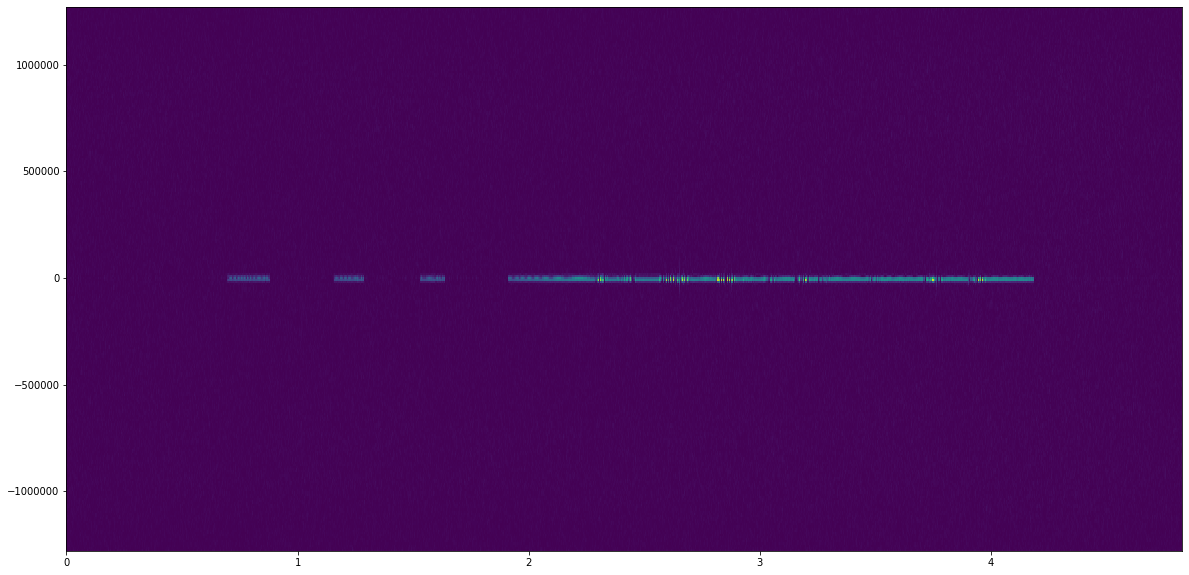

In [17]:
plt.specgram(signal_original, NFFT=256, Fs=Fs, noverlap=0, mode='magnitude', scale='linear')
plt.show()

In [18]:
# As we can see, the sample rate is WAY too high, so we will resample be decimating
decimation_factor = 64
signal_decimated = signal.decimate(signal_original, decimation_factor)
Fs /= decimation_factor

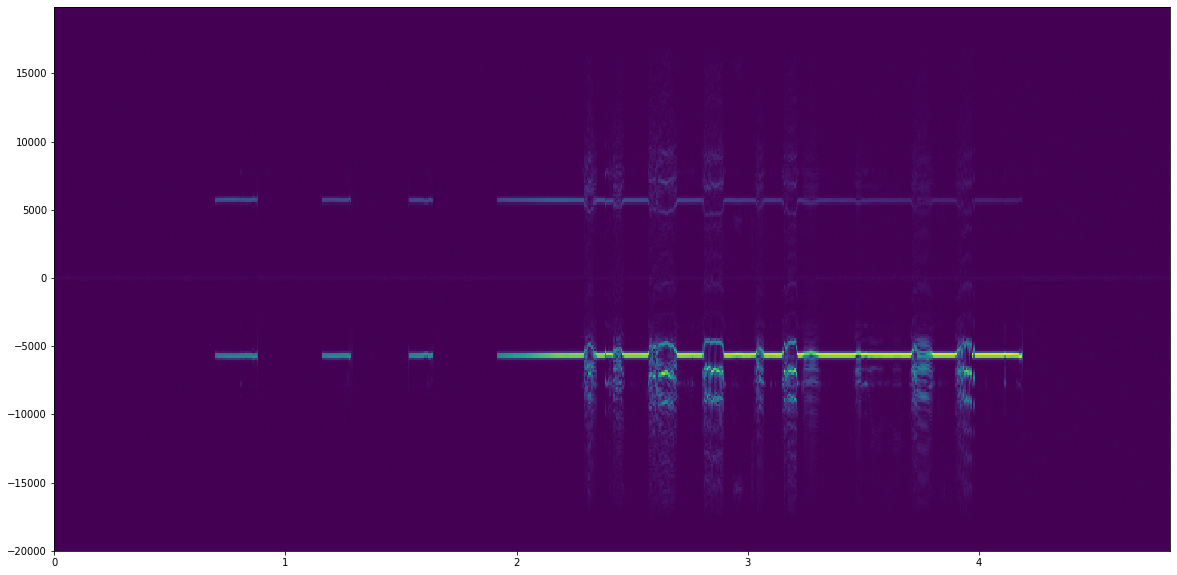

In [20]:
plt.specgram(signal_decimated, NFFT=256, Fs=Fs, noverlap=0, mode='magnitude', scale='linear')
plt.show()

In [21]:
# AM squared demod
signal_squared = signal_decimated * signal_decimated

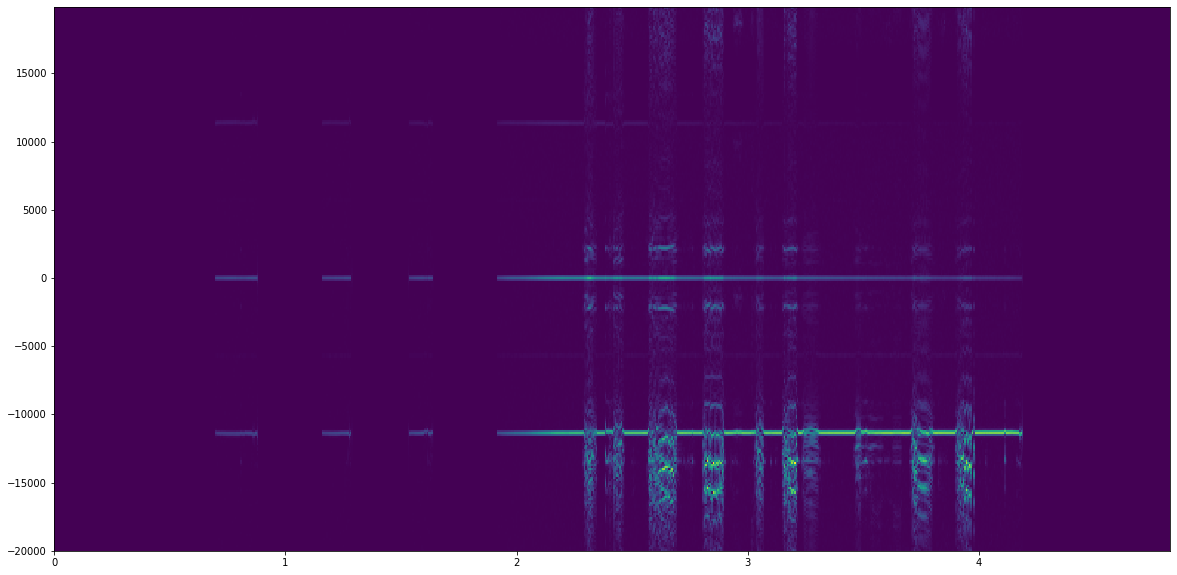

In [22]:
plt.specgram(signal_squared, NFFT=256, Fs=Fs, noverlap=0, mode='magnitude', scale='linear')
plt.show()

In [23]:
# Low Pass Filter
f1 = 8000
bands = [0,f1,f1+10,Fs/2]
lpf = signal.firls(301, bands, [1,1,0,0], nyq=Fs/2)
signal_filtered = np.convolve(lpf,signal_squared, 'same')

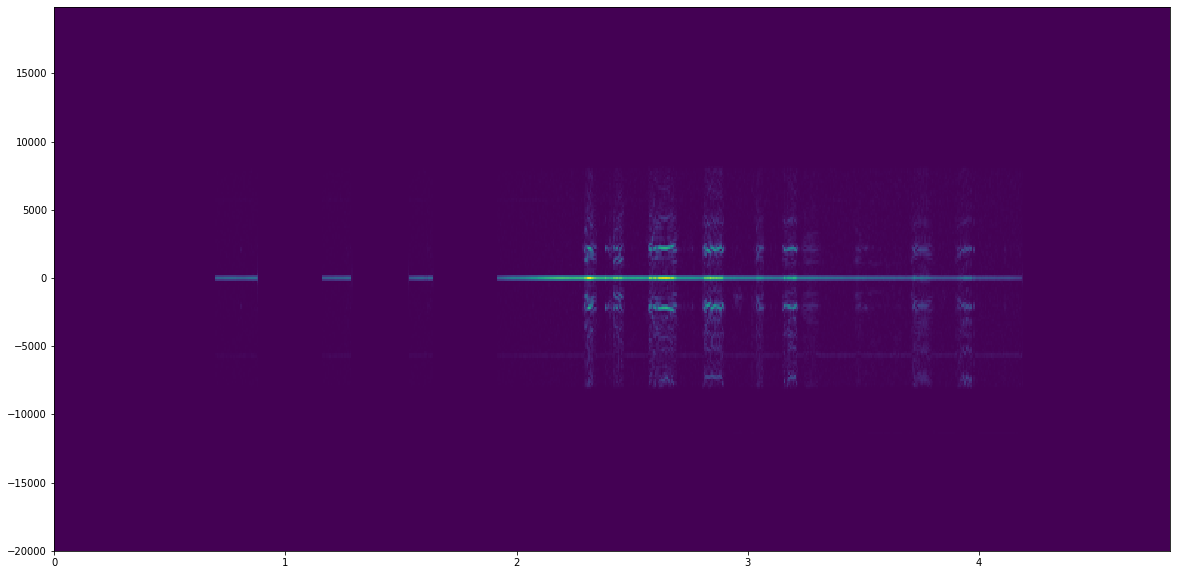

In [24]:
plt.specgram(signal_filtered, NFFT=256, Fs=Fs, noverlap=0, mode='magnitude', scale='linear')
plt.show()

In [25]:
# Before taking the real part you should upsample the complex signal by 2, lowpass filter as fs/2, frequency shift the new signal by +fs/2, now take the real part
signal_real = np.real(signal_filtered)

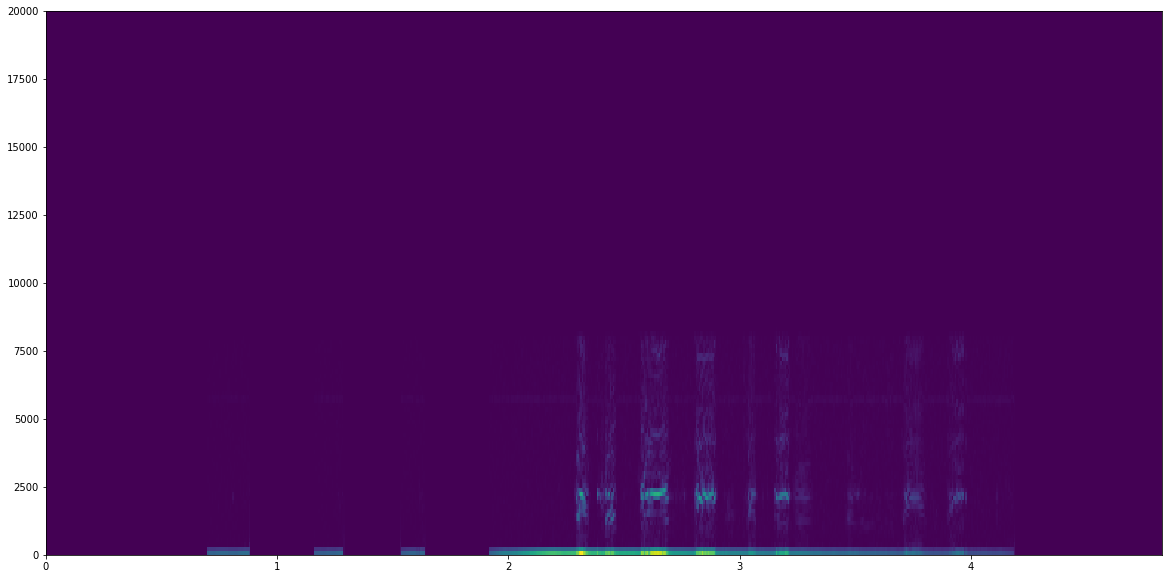

In [26]:
plt.specgram(signal_real, NFFT=256, Fs=Fs, noverlap=0, mode='magnitude', scale='linear')
plt.show()

In [27]:
# Decimate by two again, making the sampling rate 10000
decimation_factor = 2
signal_audio_decimated = signal.decimate(signal_real, decimation_factor)
Fs /= decimation_factor

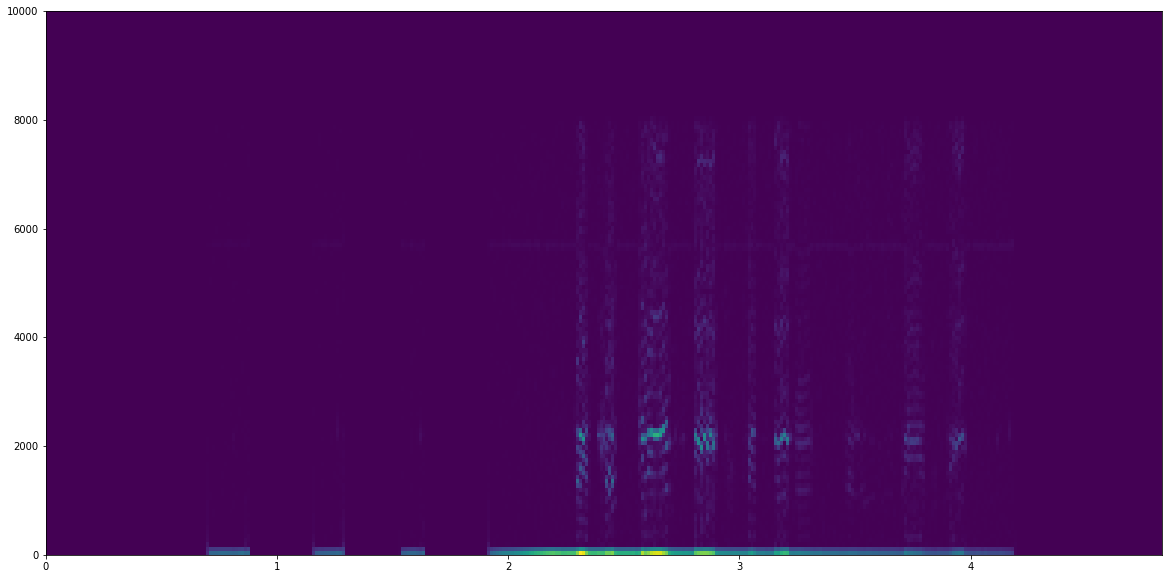

In [28]:
# Plot
plt.specgram(signal_audio_decimated, NFFT=256, Fs=20000, noverlap=0, mode='magnitude', scale='linear')
plt.show()

In [29]:
# Scale audio to adjust volume
signal_audio_decimated *= 12000 / np.max(np.abs(signal_audio_decimated))  
# Convert samples to int16 values
signal_audio_int16 = signal_audio_decimated.astype("int16")

In [30]:
# Save samples to file as 16-bit signed single-channel audio samples
wavfile.write('walkie_audio_10000.wav', 10000,signal_audio_int16)